In [17]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Need to create a validation set. Since we are training using gradient descent we must scale the input features. We'll scale them down to the 0-1 range by dividing them by 255.0

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shrirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) # input layer -> convert to 1D array
model.add(keras.layers.Dense(300, activation="relu")) # first hidden layer 300 neurons
model.add(keras.layers.Dense(100, activation="relu")) # second hidden layer 100 neurons
model.add(keras.layers.Dense(10, activation="softmax"))  # softmax layer 10 neurons one for each class

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

In [11]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7250 - accuracy: 0.7635 - val_loss: 0.5133 - val_accuracy: 0.8250
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4919 - accuracy: 0.8281 - val_loss: 0.4494 - val_accuracy: 0.8466
Epoch 3/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4446 - accuracy: 0.8439 - val_loss: 0.4195 - val_accuracy: 0.8566
Epoch 4/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4178 - accuracy: 0.8528 - val_loss: 0.4149 - val_accuracy: 0.8536
Epoch 5/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3975 - accuracy: 0.8603 - val_loss: 0.4222 - val_accuracy: 0.8550
Epoch 6/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3808 - accuracy: 0.8651 - val_loss: 0.3930 - val_accuracy: 0.8652
Epoch 7/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3671 - accuracy: 0.8702 - val_loss: 0.3820 - val_accuracy:

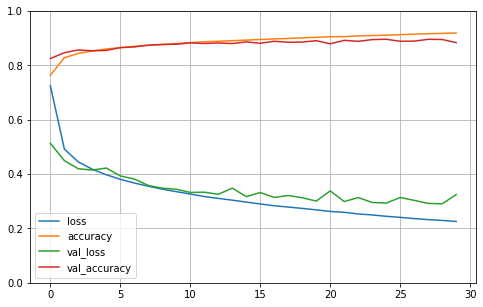

In [13]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 90.7653 - accuracy: 0.8148


[90.76526641845703, 0.8148000240325928]

In [15]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
y_pred = model.predict_classes(X_new)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U12')